## Comparing SVD with PCA and LDA

*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0/
*   e-mail - sanjay.s.rao04@gmail.com

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

### Dataset Description:
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- Feature **'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- Feature **'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- Feature **'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset can be found at https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
# importing the dataset
df = pd.read_csv('./Datasets/creditcard.csv')

# displaying the first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

### Dropping unnecessary columns, which contains null values

In [4]:
# columns containing null values
df.columns[df.isnull().any()]

Index([], dtype='object')

There is no missing data in the dataset

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There is strong imbalance in the target value counts and it will affect the model adversely. In order to solve this issue, we will oversample the dataset.

### Oversampling the dataset 

In [6]:
def _oversample_positives(df, target):
    """ Oversample the minority classes to match
    the majority class.
    
    :param df: pandas dataframe - input df.
    :param target: string - classification target column.

    :return: pandas datframe - oversampled version
    """

    class_count = df[target].value_counts()

    print("Before oversampling:\n %s" % class_count)
    
    for i in range(1,len(class_count)):
        df_i = df[df[target] == i]
        oversampling_factor_i = class_count[0] / float(class_count[i])
        print(len(df_i))
        print("Oversampling factor for class %i: %s" %(i, str(oversampling_factor_i)))
    
        # Integer part of oversampling
        df = df.append(
            [df_i] * int(math.floor(oversampling_factor_i) - 1),
            ignore_index=False)
        
        # Float part of oversampling
        df = df.append(
            [df_i.sample(frac=oversampling_factor_i % 1)],
            ignore_index=False)
    
    print("After oversampling:\n %s" % df[target].value_counts())
    print("Shape after oversampling: %s" % str(df.shape))

    return df

In [7]:
df_oversampled = _oversample_positives(df, 'Class')

Before oversampling:
 0    284315
1       492
Name: Class, dtype: int64
492
Oversampling factor for class 1: 577.8760162601626
After oversampling:
 0    284315
1    284315
Name: Class, dtype: int64
Shape after oversampling: (568630, 31)


### Splitting the dataset into Independent and Dependent variables

In [8]:
X = df_oversampled.drop(['Class'],axis = 1)
y = df_oversampled['Class']

In [9]:
X.shape

(568630, 30)

In [10]:
y.shape

(568630,)

In [11]:
y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

### Standardizing the data

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#fitting
sc.fit(X)
X = sc.transform(X)

## Singular Value Decomposition

Singular Value Decomposition (SVD) is one of the widely used methods for dimensionality reduction.SVD factors a single matrix into matrix U, D and V* respectively.
<div>
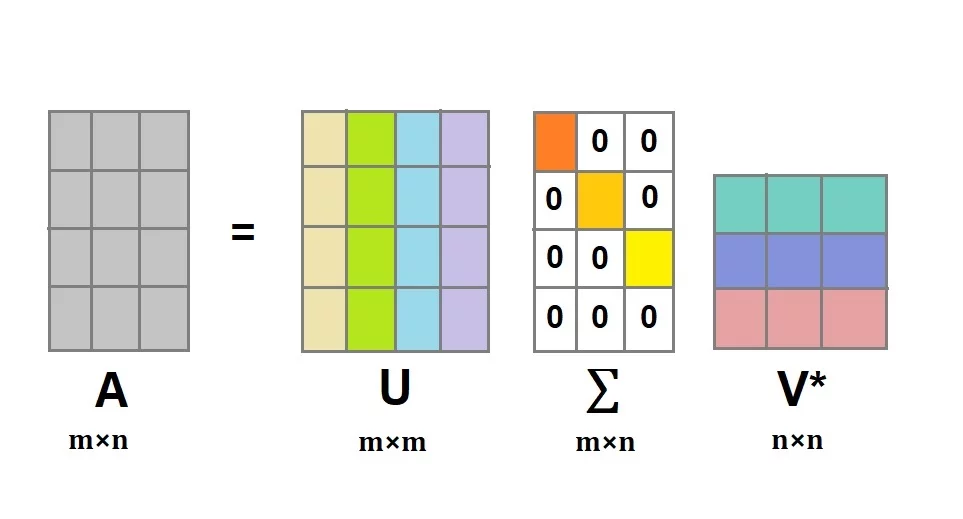
</div>

where,
- U and V* are orthogonal matrices.
- D is a diagonal matrix of singular values

### We will use *TruncatedSVD* class from sklearn.decomposition module.
In **TruncatedSVD** we need to specify the number of components we need in our output, so instead of calculating whole decompositions we just calculate the required singular values and trim the rest.

In [13]:
from sklearn.decomposition import TruncatedSVD

print("Original Matrix:")
print(X,'\n')

svd =  TruncatedSVD(n_components = 4)
X_transf = svd.fit_transform(X)

print("Singular values: \n")
print(svd.singular_values_, '\n')

print("Transformed Matrix after reducing to 2 features: \n")
print(X_transf)

Original Matrix:
[[-1.82318718  0.1849266  -0.50607553 ...  0.04765262 -0.1298721
   0.17477861]
 [-1.82318718  0.64668335 -0.41490967 ... -0.09258582 -0.05089074
  -0.40400837]
 [-1.82316641  0.18518955 -0.84697579 ... -0.13820632 -0.21530308
   1.07701347]
 ...
 [ 0.16269543 -2.73927251  2.89514817 ... -3.05691423 -1.13897195
  -0.40818392]
 [-0.54300021  0.15552059 -0.08164321 ... -1.02091148 -0.94515846
  -0.33960241]
 [-0.76086417 -1.59677225  1.64237848 ...  0.9827602   0.38446586
  -0.020724  ]] 

Singular values: 

[2542.7877135  1296.10584984 1090.64369665  966.24505921] 

Transformed Matrix after reducing to 2 features: 

[[-2.01733914e+00 -7.94782005e-02  2.70471001e-01  6.74500962e-01]
 [-1.93859229e+00 -5.18804502e-01  8.75974344e-03 -9.23376944e-02]
 [-2.09947651e+00  3.13725927e-01  9.57341935e-02  3.35452280e-01]
 ...
 [ 9.40787005e+00  5.17289672e+00 -1.45797124e+00  8.32696165e-01]
 [-2.63074071e-01  6.55399003e-01  3.30754008e-03  1.21232130e-02]
 [ 3.52742840e+00 -1

### Training data and testing data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_transf, y, test_size=0.2,random_state=1)

### Modelling - Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict(X_train)

### Model Evaluation

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[56398   528]
 [ 9432 47368]]
Accuracy: 0.9124210822503209


## Principal Component Analysis

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

In [17]:
# Importing standardscalar module
from sklearn.preprocessing import StandardScaler
df_new = pd.DataFrame(X)
y_target = pd.DataFrame(y)
scalar = StandardScaler()

# fitting
scalar.fit(df_new)
scaled_data = scalar.transform(df_new)

# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components = 4)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(x_pca.shape)
PCA_df = pd.DataFrame(x_pca)
PCA_df.head()

(568630, 4)


,0,1,2,3
0,-2.017339,-0.079470,0.270388,0.673812
1,-1.938592,-0.518795,0.008829,-0.091917
2,-2.099477,0.313761,0.096197,0.338912
3,-2.340707,-0.038475,-0.452649,-1.047944
4,-1.898887,-0.053940,0.789904,0.433344


Text(0, 0.5, 'Second Principal Component')

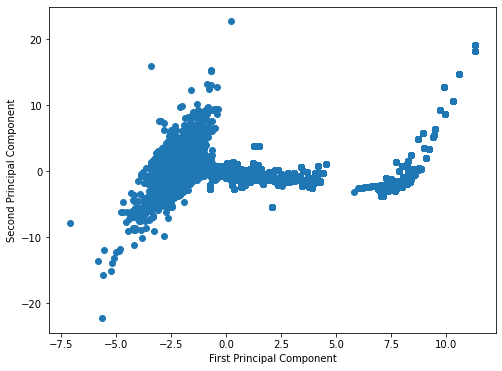

In [18]:
# giving a larger plot
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1])

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Referring to the above scatter plot, we can say that the ***first principal component*** is more significant compared to the second as it explains more variability of the data.

### Training data and testing data

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(PCA_df, y_target, test_size=0.2,random_state=1)

### Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X1_train, y1_train)
y1_pred = classifier.predict(X1_test)
y1_pred2 = classifier.predict(X1_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Model Evaluation

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm1 = confusion_matrix(y1_test, y1_pred)

print(cm1)
print('Accuracy: ' + str(accuracy_score(y1_test, y1_pred)))

[[56399   527]
 [ 9432 47368]]
Accuracy: 0.912429875314352


## Linear Discriminant Analysis

Linear Discriminant Analysis as its name suggests is a linear model for classification and dimensionality reduction.  Most commonly used for feature extraction in pattern classification problems. 

#### Assumptions:
LDA makes some assumptions about the data:

- Assumes the data to be distributed normally or Gaussian distribution of data points i.e. each feature must make a bell-shaped curve when plotted. 
- Each of the classes has identical covariance matrices.

However, it is worth mentioning that LDA performs quite well even if the assumptions are violated.

In [22]:
X = df_oversampled.drop(['Class'],axis = 1)
y = df_oversampled['Class']

#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2,random_state=1)

#standard scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1) #n_components to be less than the n_classes count 
X2_train = lda.fit_transform(X2_train, y2_train)
X2_test = lda.transform(X2_test)
LDA_df = pd.DataFrame(X2_test)
LDA_df.head(10)

,0
0,1.756621
1,1.403868
2,-0.689782
3,-2.580664
4,1.359420
5,-0.806514
6,0.152612
7,0.525995
8,-0.154143
9,0.276257


In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X2_train, y2_train)
y2_pred = classifier.predict(X2_test)
y2_pred2 = classifier.predict(X2_train)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y2_test, y2_pred)

print(cm)
print('Accuracy: ' + str(accuracy_score(y2_test, y2_pred)))

[[54632  2294]
 [ 5744 51056]]
Accuracy: 0.9293213513180802


## Inference:

The model performance with **SVD** and **PCA** was exactly the same with an accuracy of **91.24%** since we scaled down the whole dataset into 4 features, and both the methods worked siilarly on our data where as, **LDA** performed slightly higher in our case with a accuracy of **92.93%**. With all the three techniques, we did not witness any major loss of information of our original data.